<h1>Casa</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/Casa.png?raw=1" width="900">

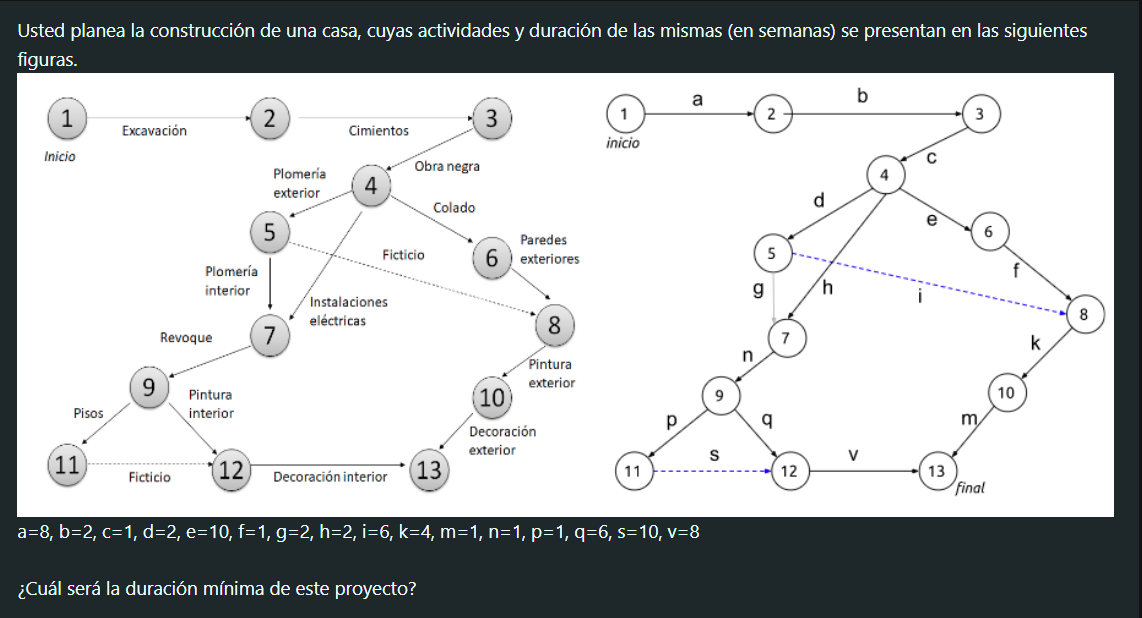

| De/Hacia| 1 | 2  | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12| 13 |
| :-:     |:-:|:-: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-: |
| 1 |       - | a  | - | - | - | - | - | - | - | - | - | - | -  |
| 2 |       - | -  | b | - | - | - | - | - | - | - | - | - | -  |
| 3 |       - | -  | - | c | - | - | - | - | - | - | - | - | -  |
| 4 |       - | -  | - | - | d | e | h | - | - | - | - | - | -  |
| 5 |       - | -  | - | - | - | - | g | i | - | - | - | - | -  |
| 6 |       - | -  | - | - | - | - | - | f | - | - | - | - | -  |
| 7 |       - | -  | - | - | - | - | - | - | n | - | - | - | -  |
| 8 |       - | -  | - | - | - | - | - | - | - | k | - | - | -  |
| 9 |       - | -  | - | - | - | - | - | - | - | - | p | q | -  |
| 10|       - | -  | - | - | - | - | - | - | - | - | - | - | m  |
| 11|       - | -  | - | - | - | - | - | - | - | - | - | s | -  |
| 12|       - | -  | - | - | - | - | - | - | - | - | - | - | v  |
| 13|       - | -  | - | - | - | - | - | - | - | - | - | - | -  |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((13,13), boolean = True)
a=1
b=6
c=2
d=9
e=3
f=5
g=8
h=1
i=7
k=5
m=1
n=3
p=5
q=3
s=5
v=3
# Función objetivo:
c = [
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [a,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,b,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,c,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,d,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,e,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,h,g,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,i,f,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,n,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,k,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,p,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,q,-99999,s,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,m,-99999,v,-99999],
  ]

Z = cvx.Maximize(cvx.sum(cvx.multiply(c,x)))

# Restricciones
r = [
    # de oferta
     cvx.sum(x[0,:]) <= 1,

    # de demanda
     cvx.sum(x[:,12]) >= 1,

    # de transbordo
    cvx.sum(x[:,1]) - cvx.sum(x[1,:]) >= 0,
    cvx.sum(x[:,2]) - cvx.sum(x[2,:]) >= 0,
    cvx.sum(x[:,3]) - cvx.sum(x[3,:]) >= 0,
    cvx.sum(x[:,4]) - cvx.sum(x[4,:]) >= 0,
    cvx.sum(x[:,5]) - cvx.sum(x[5,:]) >= 0,
    cvx.sum(x[:,6]) - cvx.sum(x[6,:]) >= 0,
    cvx.sum(x[:,7]) - cvx.sum(x[7,:]) >= 0,
    cvx.sum(x[:,8]) - cvx.sum(x[8,:]) >= 0,
    cvx.sum(x[:,9]) - cvx.sum(x[9,:]) >= 0,
    cvx.sum(x[:,10]) - cvx.sum(x[10,:]) >= 0,
    cvx.sum(x[:,11]) - cvx.sum(x[11,:]) >= 0,
]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(1,len(c)+1)]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)


optimal
42.0
      1    2    3    4    5    6    7    8    9   10   11   12   13
1   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  1.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.0  1.0 -0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 -0.0  0.0
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


<h1>Constructora</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/Constructora.png?raw=1" width="900">

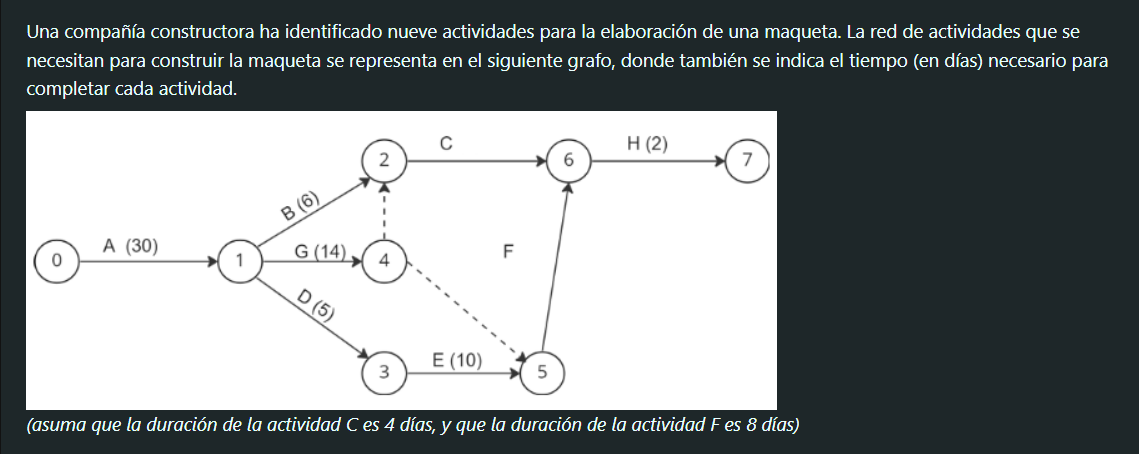

| De/Hacia| 0 | 1  | 2 | 3 | 4 | 5 | 6 | 7
| :-: | :-: | :-:  | :-: | :-: | :-: | :-: | :-: | :-: |
| 0 | -9999 | 30 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| 1 | -9999 | -9999 | 6 | 5 | 14 | -9999 | -9999 | -9999 |
| 2 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | C | -9999 |
| 3 | -9999 | -9999 | -9999 | -9999 | -9999 | 10 | -9999 | -9999 |
| 4 | -9999 | -9999 | 0 | -9999 | -9999 | 0 | -9999 | -9999 |
| 5 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | F | -9999 |
| 6 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 2 |
| 7 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((8,8), boolean = True)
C=4
F=5
# Función objetivo:
c = [
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [30,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,6,-99999,-99999,0,-99999,-99999,-99999],
    [-99999,5,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,14,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,10,0,-99999,-99999,-99999],
    [-99999,-99999,C,-99999,-99999,F,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,2,-99999],
  ]

Z = cvx.Maximize(cvx.sum(cvx.multiply(c,x)))

# Restricciones
r = [
    # de oferta
     cvx.sum(x[0,:]) <= 1,

    # de demanda
     cvx.sum(x[:,7]) >= 1,

    # de transbordo
    cvx.sum(x[:,1]) - cvx.sum(x[1,:]) >= 0,
    cvx.sum(x[:,2]) - cvx.sum(x[2,:]) >= 0,
    cvx.sum(x[:,3]) - cvx.sum(x[3,:]) >= 0,
    cvx.sum(x[:,4]) - cvx.sum(x[4,:]) >= 0,
    cvx.sum(x[:,5]) - cvx.sum(x[5,:]) >= 0,
    cvx.sum(x[:,6]) - cvx.sum(x[6,:]) >= 0,

]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(len(c))]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)


optimal
52.0
     0    1    2    3    4    5    6    7
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  1.0 -0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
4  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0


<h1>Profesora</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/Profesora.png?raw=1" width="900">

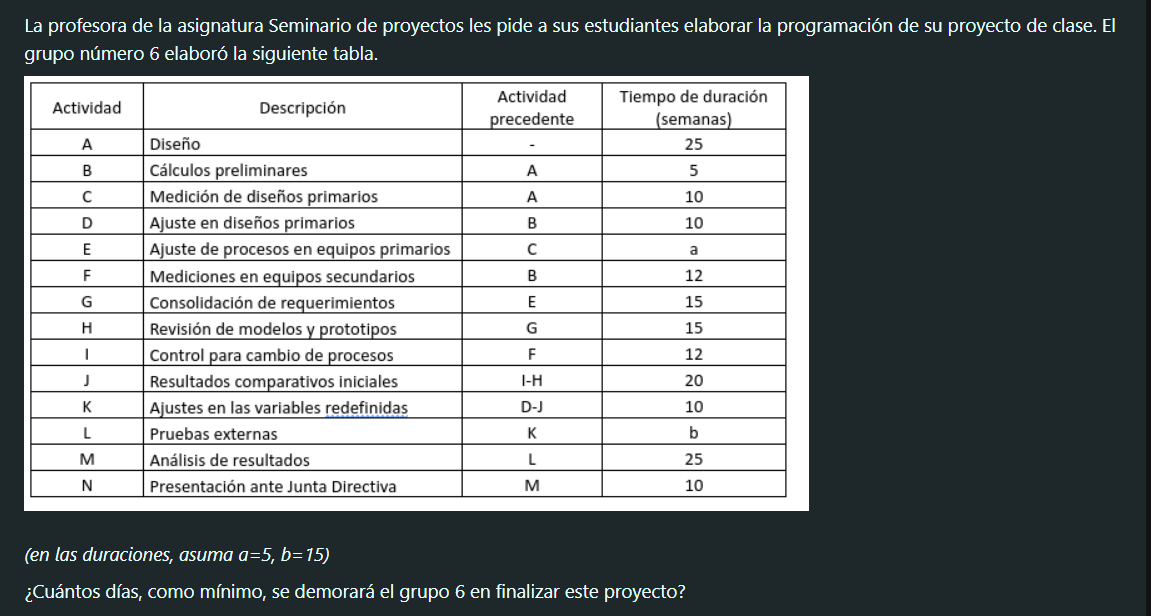

| De/Hacia| A | B | C  | D | E | F | G | H | I | J | K | L | M | N | T
| :-: | :-: | :-:  | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| A | -9999 | 25 | 25 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| B | -9999 |-9999|-9999| 5 | -9999 | 5 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| C | -9999 |-9999|-9999| -9999 | 10 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| D | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 10 | -9999 | -9999 | -9999 | -9999 |
| E | -9999 |-9999|-9999| -9999 | -9999 | -9999 | a | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| F | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | 12 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| G | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | 15 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |
| H | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 15| -9999 | -9999 | -9999 | -9999 | -9999 |
| I | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 12 | -9999 | -9999 | -9999 | -9999 | -9999 |
| J | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 20 | -9999 | -9999 | -9999 | -9999 |
| K | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 10 | -9999 | -9999 | -9999 |
| L | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | b | -9999 | -9999 |
| M | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 25 | -9999 |
| N | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | 10 |
| T | -9999 |-9999|-9999| -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 | -9999 |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((15,15), boolean = True)
a=8
b=15
# Función objetivo:
c = [
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [25,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [25,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,5,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-9999,10,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,5,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,a,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,15,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,12,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,15,12,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,10,-99999,-99999,-99999,-99999,-99999,20,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,10,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,b,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,25,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,10,-99999],
]

Z = cvx.Maximize(cvx.sum(cvx.multiply(c,x)))

# Restricciones
r = [
    # de oferta
     cvx.sum(x[0,:]) <= 1,

    # de demanda
     cvx.sum(x[:,14]) >= 1,

    # de transbordo
    cvx.sum(x[:,1]) - cvx.sum(x[1,:]) >= 0,
    cvx.sum(x[:,2]) - cvx.sum(x[2,:]) >= 0,
    cvx.sum(x[:,3]) - cvx.sum(x[3,:]) >= 0,
    cvx.sum(x[:,4]) - cvx.sum(x[4,:]) >= 0,
    cvx.sum(x[:,5]) - cvx.sum(x[5,:]) >= 0,
    cvx.sum(x[:,6]) - cvx.sum(x[6,:]) >= 0,
    cvx.sum(x[:,7]) - cvx.sum(x[7,:]) >= 0,
    cvx.sum(x[:,8]) - cvx.sum(x[8,:]) >= 0,
    cvx.sum(x[:,9]) - cvx.sum(x[9,:]) >= 0,
    cvx.sum(x[:,10]) - cvx.sum(x[10,:]) >= 0,
    cvx.sum(x[:,11]) - cvx.sum(x[11,:]) >= 0,
    cvx.sum(x[:,12]) - cvx.sum(x[12,:]) >= 0,
    cvx.sum(x[:,13]) - cvx.sum(x[13,:]) >= 0,


]

P = cvx.Problem(Z,r)
P.solve()

print(P.status)
print(P.value)
print(np.round(x.value,0))

optimal
153.0
[[ 0. -0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.]]


<h1>Maquina</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/Maquina.png?raw=1" width="900">

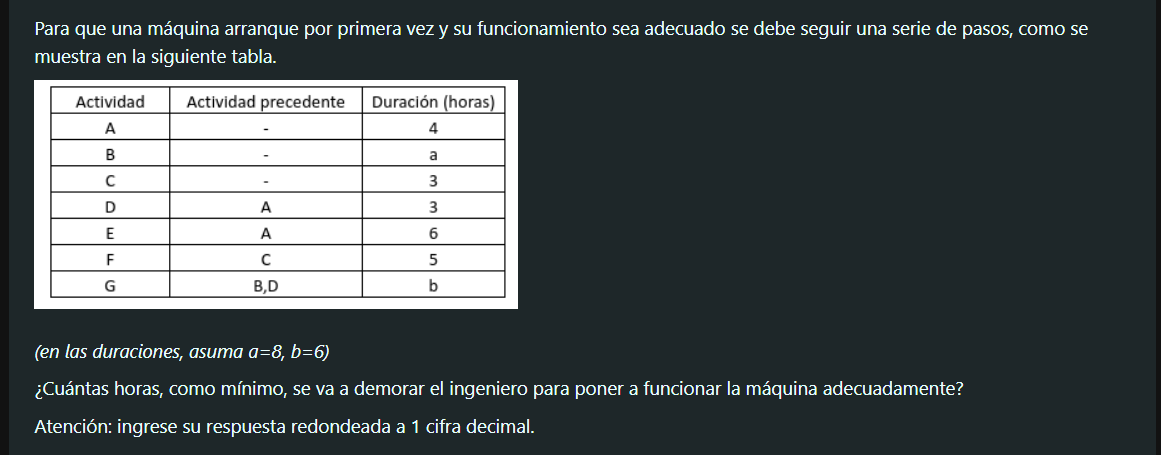

| De/Hacia| A | B  | C | D | E | F | G | Z |
| :-:     |:-:|:-: |:-:|:-:|:-:|:-:|:-:|:-:|
| A |       - | -  | - | 4 | 4 | - | - | - |
| B |       - | -  | - | - | - | - | a | - |
| C |       - | -  | - | - | - | 3 | - | - |
| D |       - | -  | - | - | - | - | 3 | - |
| E |       - | -  | - | - | - | - | - | 6 |
| F |       - | -  | - | - | - | - | - | 5 |
| G |       - | -  | - | - | - | - | - | b |
| Z |       - | -  | - | - | - | - | - | - |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((8,8), boolean = True)
a=11
b=6
# Función objetivo:
c = [
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [4,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [4,-99999,-99999,-99999,-99999,-99999,-99999,-99999],
    [-99999,-99999,3,-99999,-99999,-99999,-99999,-99999],
    [-99999,a,-99999,3,-99999,-99999,-99999,-99999],
    [-99999,-99999,-99999,-99999,6,5,b,-99999],
  ]

Z = cvx.Maximize(cvx.sum(cvx.multiply(c,x)))

# Restricciones
r = [
    # de oferta
     cvx.sum(x[1,:]) <= 1,

    # de demanda
     cvx.sum(x[:,7]) >= 1,

    # de transbordo
    cvx.sum(x[:,0]) - cvx.sum(x[0,:]) >= 0,
    cvx.sum(x[:,2]) - cvx.sum(x[2,:]) >= 0,
    cvx.sum(x[:,3]) - cvx.sum(x[3,:]) >= 0,
    cvx.sum(x[:,4]) - cvx.sum(x[4,:]) >= 0,
    cvx.sum(x[:,5]) - cvx.sum(x[5,:]) >= 0,
    cvx.sum(x[:,6]) - cvx.sum(x[6,:]) >= 0,
]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(1,len(c)+1)]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)


optimal
17.0
     1    2    3    4    5    6    7    8
1  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
